In [1]:
import pandas as pd
import boto3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Review files in s3
bucket='data-science-csv'
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucket)
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object.key)

calendar.csv
listings.csv
reviews.csv


In [3]:
# Inspect calendar csv
data_key = 'calendar.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
calendar_df = pd.read_csv(data_location, index_col='listing_id')
print(calendar_df.head())

                  date available   price
listing_id                              
241032      2016-01-04         t  $85.00
241032      2016-01-05         t  $85.00
241032      2016-01-06         f     NaN
241032      2016-01-07         f     NaN
241032      2016-01-08         f     NaN


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
# Inspect listings csv columns
listings_key = 'listings.csv'
data_location = 's3://{}/{}'.format(bucket, listings_key)
listings_df = pd.read_csv(data_location, index_col = 0)
print(listings_df.shape)
print(listings_df.columns)

(3818, 91)
Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenitie

In [5]:
# Inspect reviews csv
reviews_key = 'reviews.csv'
data_location = 's3://{}/{}'.format(bucket, listings_key)
reviews_df = pd.read_csv(data_location, index_col = 0)
print(reviews_df)

                                    listing_url       scrape_id last_scraped  \
id                                                                             
241032      https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
953595      https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
3308979    https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
7421966    https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
278830      https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   
...                                         ...             ...          ...   
8101950    https://www.airbnb.com/rooms/8101950  20160104002432   2016-01-04   
8902327    https://www.airbnb.com/rooms/8902327  20160104002432   2016-01-04   
10267360  https://www.airbnb.com/rooms/10267360  20160104002432   2016-01-04   
9604740    https://www.airbnb.com/rooms/9604740  20160104002432   2016-01-04   
10208623  https://www.airbnb.com/rooms/1

In [6]:
# Remove reviews_df rows with all nulls
reviews_df_cleaned = reviews_df.dropna(axis=0, how='all')
# Compare before/after
print(reviews_df.isna().shape)
print(reviews_df_cleaned.isna().shape)

(3818, 91)
(3818, 91)


In [7]:
# Remove calendar_df rows with any nulls
calendar_df_cleaned = calendar_df.dropna(axis=0, how='any')
print(calendar_df.isna().shape)
print(calendar_df_cleaned.isna().shape)

(1393570, 3)
(934542, 3)


In [8]:
# Copy listings dataframe
listings_df_cleaned = listings_df

drop_columns = ['name', 'listing_url', 'scrape_id', 'last_scraped',\
                'description', 'summary', 'space', 'experiences_offered', \
                'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', \
                'medium_url', 'picture_url', 'xl_picture_url','host_about', \
                'host_thumbnail_url', 'host_verifications', 'country_code', 'latitude', \
                'longitude', 'host_picture_url', 'square_feet', \
                'requires_license', 'license', 'jurisdiction_names']
# Drop columns of limited usefulness
listings_df_cleaned = listings_df_cleaned.drop(drop_columns, axis=1)

# Review all the column names, top values, and presence of null values
for col in listings_df_cleaned.columns:
    print(col)
    print(listings_df_cleaned[col].value_counts())
    print('percent_null', listings_df_cleaned[col].isna().mean())

host_id
8534462     46
4962900     39
1243056     37
430709      36
3074414     34
            ..
38090170     1
11839982     1
668141       1
1691632      1
10420224     1
Name: host_id, Length: 2751, dtype: int64
percent_null 0.0
host_url
https://www.airbnb.com/users/show/8534462     46
https://www.airbnb.com/users/show/4962900     39
https://www.airbnb.com/users/show/1243056     37
https://www.airbnb.com/users/show/430709      36
https://www.airbnb.com/users/show/3074414     34
                                              ..
https://www.airbnb.com/users/show/964658       1
https://www.airbnb.com/users/show/24017361     1
https://www.airbnb.com/users/show/15606907     1
https://www.airbnb.com/users/show/44360796     1
https://www.airbnb.com/users/show/5062312      1
Name: host_url, Length: 2751, dtype: int64
percent_null 0.0
host_name
Andrew      56
Jordan      48
Daniela     47
Michael     46
Melissa     45
            ..
Hande        1
Carlos       1
Pablo        1
Isai         1


In [9]:
# Understand size of data set where null values only account for 20% of column values
print(listings_df_cleaned[listings_df_cleaned.isna().mean(1)<.2].shape)
print(listings_df_cleaned['host_is_superhost'].head())

(3367, 65)
id
241032     f
953595     t
3308979    f
7421966    f
278830     f
Name: host_is_superhost, dtype: object


In [10]:
print(listings_df_cleaned['host_is_superhost'].head())
print(listings_df['host_is_superhost'].value_counts())

def to_binary(column):
    ''' Convert boolean column to binary format
    INPUT
        column - 
    
    OUTPUT
        return 1 if the string == 't'
        return 0 otherwise
    
    '''
    if column == 't':
        return 1
    else:
        return 0

# Apply to_binary to superhost column
listings_df_cleaned['host_is_superhost'] = listings_df_cleaned['host_is_superhost'].apply(to_binary)

id
241032     f
953595     t
3308979    f
7421966    f
278830     f
Name: host_is_superhost, dtype: object
f    3038
t     778
Name: host_is_superhost, dtype: int64


In [11]:
# Apply formatting to various columns of interest
listings_df_cleaned = listings_df_cleaned.astype({"host_is_superhost": int, "availability_60": int})

# Subset by superhost/no superhost
listings_super = listings_df_cleaned[listings_df_cleaned['host_is_superhost'] == 1]
listings_nosuper = listings_df_cleaned[listings_df_cleaned['host_is_superhost'] == 0]

# Dataframes to understand frequencies of availability across different types of hosts
super_df = pd.DataFrame(listings_super['availability_60'].value_counts())
nosuper_df = pd.DataFrame(listings_nosuper['availability_60'].value_counts())

# Calculate percentage of total for each availability day point
super_df['superHostPercent'] = super_df['availability_60']/len(listings_super)
nosuper_df['hostPercent'] = nosuper_df['availability_60']/len(listings_nosuper)

# Drop original column
super_df = super_df.drop(['availability_60'], axis=1)
nosuper_df = nosuper_df.drop(['availability_60'], axis=1)

# Join the two dataframes
df_join = pd.concat([super_df, nosuper_df], axis=1)

# Calculate delta between two data sets
df_join['delta'] = df_join['superHostPercent'] - df_join['hostPercent']

# Sort dataframe
df_join = df_join.sort_index(ascending=False)

# Create a stylized bar chart to visualize differences
df_join.style.bar(subset=['delta'], align='mid', color=['#d65f5f', '#5fba7d'])

,superHostPercent,hostPercent,delta
60,0.183805,0.257237,-0.073432
59,0.019280,0.035197,-0.015917
58,0.024422,0.015789,0.008632
57,0.020566,0.025000,-0.004434
56,0.032134,0.019079,0.013055
55,0.020566,0.023684,-0.003119
54,0.021851,0.016118,0.005732
53,0.026992,0.018750,0.008242
52,0.030848,0.017105,0.013743
51,0.024422,0.013816,0.010606


{'TV': 2574, 'Cable TV': 1446, 'Internet': 2811, 'Wireless Internet': 3667, 'Air Conditioning': 677, 'Kitchen': 3423, 'Heating': 3627, 'Family/Kid Friendly': 1963, 'Washer': 2992, 'Dryer': 2997, 'Free Parking on Premises': 2167, 'Buzzer/Wireless Intercom': 538, 'Smoke Detector': 3281, 'Carbon Monoxide Detector': 2485, 'First Aid Kit': 1680, 'Safety Card': 727, 'Fire Extinguisher': 2196, 'Essentials': 3237, 'Pets Allowed': 472, 'Pets live on this property': 883, 'Dog(s)': 509, 'Cat(s)': 382, 'Hot Tub': 303, 'Indoor Fireplace': 886, 'Shampoo': 2670, 'Breakfast': 291, '24-Hour Check-in': 616, 'Hangers': 846, 'Hair Dryer': 774, 'Iron': 742, 'Laptop Friendly Workspace': 745, 'Suitable for Events': 209, 'Elevator in Building': 785, 'Lock on Bedroom Door': 100, 'Wheelchair Accessible': 300, 'Gym': 442, '': 45, 'Pool': 159, 'Smoking Allowed': 82, 'Other pet(s)': 51, 'Doorman': 85, 'Washer / Dryer': 2}


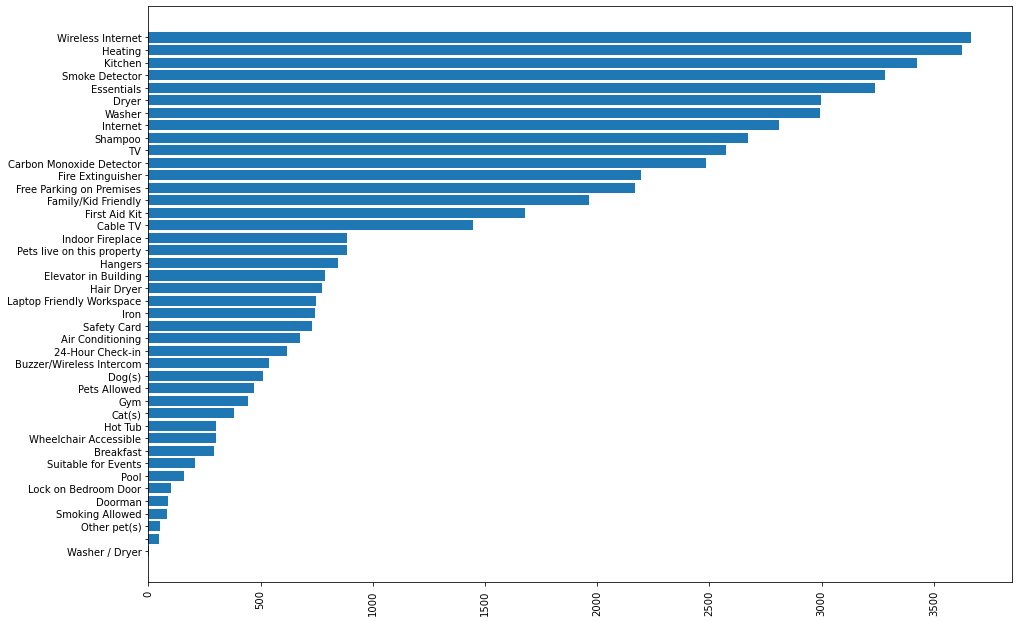

In [12]:
import json
import collections
import matplotlib.pylab as plt

# Understand what amenities field looks like
amenities_vals = listings_df_cleaned['amenities'].value_counts()

# Clean up the data sets
listings_df_cleaned['amenities'] = listings_df_cleaned['amenities'].str.strip('{}')
subset_data = listings_df_cleaned.amenities.map(lambda x: x.replace('"', ''))

# Create an amenity list
amenity_list = []

# Loop through subset_data and append values to list
for list in subset_data:
    list = list.split(",")
    for item in list:
        amenity_list.append(item)

# Understand various counts of each amenity
counter = dict(collections.Counter(amenity_list))
print(counter)

# Sorted dicitionary based on value
sorted_dict = dict(sorted(counter.items(), key=lambda item: item[1]))

# Separate into values and keys for plotting purposes
x = sorted_dict.values()
y = sorted_dict.keys()
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.barh(range(len(y)), x)
plt.xticks(rotation = 90)
plt.yticks(range(len(y)), y)
plt.show()

Questions to answer
 1. Can we accurately predict review_scores_rating from the dataset?
 2. What are the top amenities offered?
 3. What sorts of listing attributes are unique to super hosts?
 4. Which neighborhoods tend to have lowest pecentage of 5+ accomodations

   neighbourhood  accommodate_mean  listing_count
0     Green Lake          0.326923             52
1       Magnolia          0.418182             55
2  Phinney Ridge          0.285714             56
3        Ravenna          0.169492             59
4  Columbia City          0.245902             61


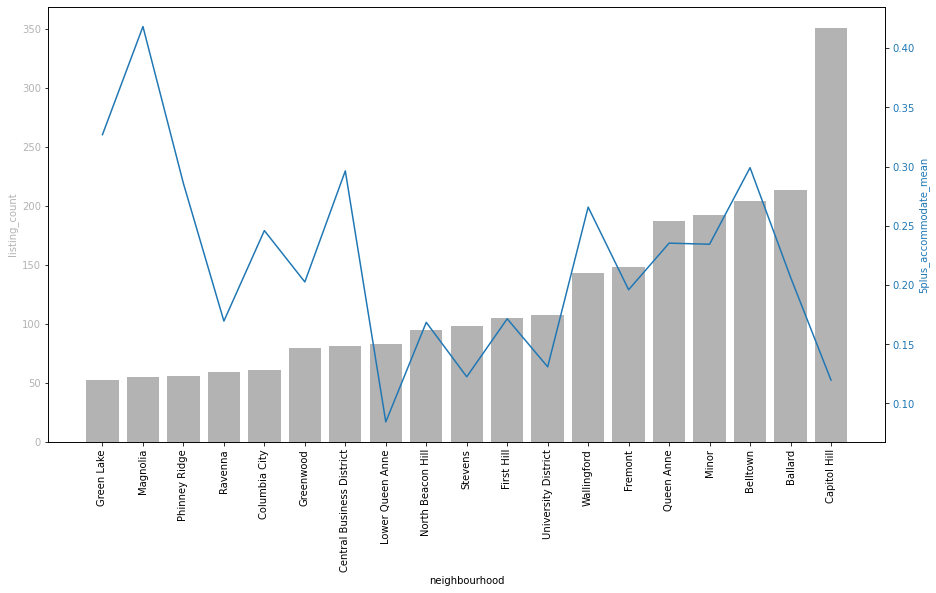

In [108]:
# Mask accommodations field 
acc_df = listings_df_cleaned.copy()
# Set accomodate_flag to 1 if listing can handle 5 or more guests
acc_df['accommodate_flag'] = 0
acc_df.loc[acc_df['accommodates'] > 4, 'accommodate_flag'] = 1

# Determine high occupandy percentage using aggregation of sum/count
acc_df = pd.DataFrame(acc_df.groupby('neighbourhood').agg({'accommodate_flag': ['mean', 'count']}))
acc_df.columns = ['accommodate_mean', 'listing_count']

# Filter neighborhoods for > 50 listings

acc_df = acc_df[acc_df['listing_count'] > 50].sort_values(by='listing_count', ascending=True)

acc_df = acc_df.reset_index()
print(acc_df.head())
# Plot volume of listings along with high occupancy rate
color = '0.7'
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)
ax1.set_xlabel('neighbourhood')
ax1.set_ylabel('listing_count', color=color)
ax1.bar(acc_df.neighbourhood, acc_df.listing_count, color=color)
ax1.tick_params(axis='x', labelrotation=90)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:blue'
ax2.set_ylabel('5plus_accommodate_mean', color=color)  # we already handled the x-label with ax1
ax2.plot(acc_df.neighbourhood, acc_df.accommodate_mean, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [ ]:
def create_dummy_df(df, cat_cols, dummy_na):
    ''' Create dummy columns for categorical columns
    INPUT:
        df - pandas dataframe with categorical variables you want to dummy
        cat_cols - list of strings that are associated with names of the categorical columns
        dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
        df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [ ]:
# Create a dataframe of only categorical columns
cat_df = listings_df_cleaned.select_dtypes(include=['object'])

# Create a list of categorical columns
cat_cols_lst = cat_df.columns

# Apply create_dummy_df function to dataframe, pass in categorical columns
df_new = create_dummy_df(listings_df_cleaned, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.columns)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''Apply a linear regression model to a dataframe
    INPUT:
        df - a dataframe holding all the variables of interest
        response_col - a string holding the name of the column 
        cat_cols - list of strings that are associated with names of the categorical columns
        dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
        test_size - a float between [0,1] about what proportion of data should be in the test dataset
        rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
        test_score - float - r2 score on the test data
        train_score - float - r2 score on the test data
        lm_model - model object from sklearn
        X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    '''
    
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Fill the mean of the column for any missing values
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    # Split your data into an X matrix and a response vector y
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    # Create training and test sets of data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    # Instantiate and fit LinearRegression model with normalized data
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    # Predict the response for the training data and the test data
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'review_scores_rating', cat_cols_lst, dummy_na=False)

In [ ]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))